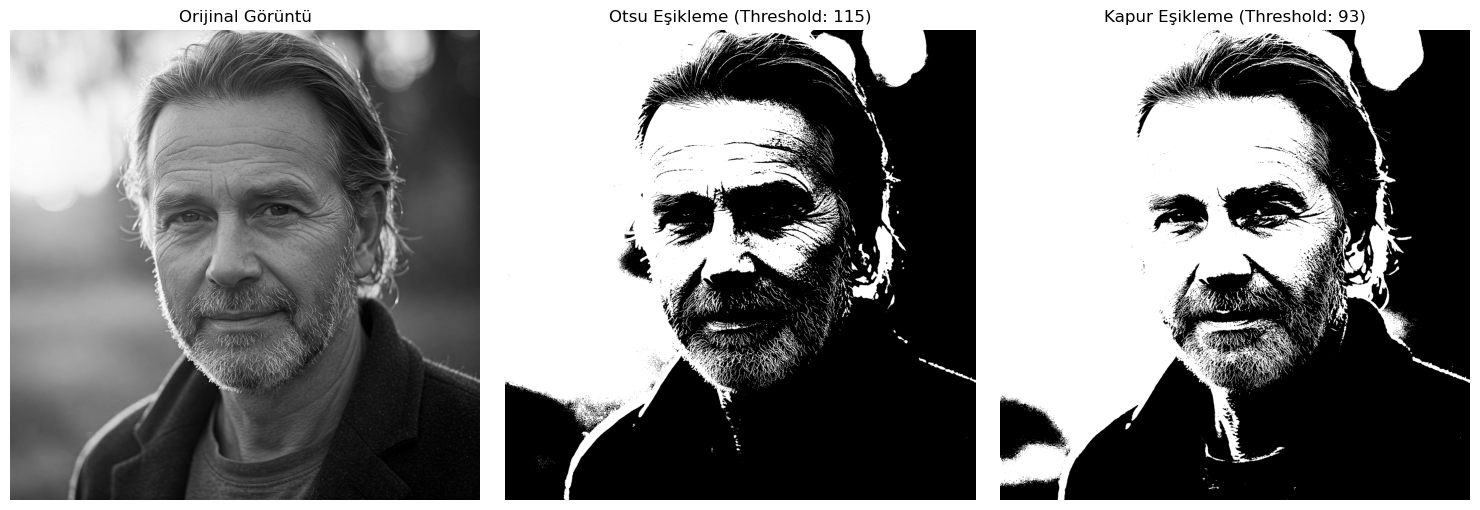

In [3]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu

import matplotlib.pyplot as plt

# Görüntüyü yükleme
image = cv2.imread('Gemini_Generated_Image_lk1cj7lk1cj7lk1c.jpg', cv2.IMREAD_GRAYSCALE)

# Otsu algoritması ile eşikleme
otsu_thresh = threshold_otsu(image)
otsu_binary = image > otsu_thresh

# Kapur entropisi ile eşikleme (Custom implementation)
def kapur_entropy_threshold(image):
	hist, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 256))
	hist = hist.astype(np.float32) / hist.sum()  # Normalize histogram

	cumsum = np.cumsum(hist)
	cumsum_inv = np.cumsum(hist[::-1])[::-1]

	entropy_bg = np.cumsum(hist * np.log(hist + 1e-10)) - cumsum * np.log(cumsum + 1e-10)
	entropy_fg = (np.cumsum((hist * np.log(hist + 1e-10))[::-1])[::-1] - cumsum_inv * np.log(cumsum_inv + 1e-10))

	total_entropy = entropy_bg + entropy_fg
	optimal_threshold = np.argmax(total_entropy)

	return optimal_threshold

kapur_thresh = kapur_entropy_threshold(image)
kapur_binary = image > kapur_thresh

# Sonuçları görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Orijinal Görüntü')
axes[0].axis('off')

axes[1].imshow(otsu_binary, cmap='gray')
axes[1].set_title(f'Otsu Eşikleme (Threshold: {otsu_thresh})')
axes[1].axis('off')

axes[2].imshow(kapur_binary, cmap='gray')
axes[2].set_title(f'Kapur Eşikleme (Threshold: {kapur_thresh})')
axes[2].axis('off')

plt.tight_layout()
plt.show()